<a href="https://colab.research.google.com/github/joelvsam/AI_Health_Assistant/blob/main/Primary%20Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [8]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BreastCancer.csv"
df = pd.read_csv(data_url)
df.head()


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [9]:
label_column = "Class"

X = df.drop(columns=[label_column])
y = df[label_column]


In [10]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [11]:
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [13]:
variance_filter = VarianceThreshold(threshold=0.01)
X_reduced = variance_filter.fit_transform(X_scaled)


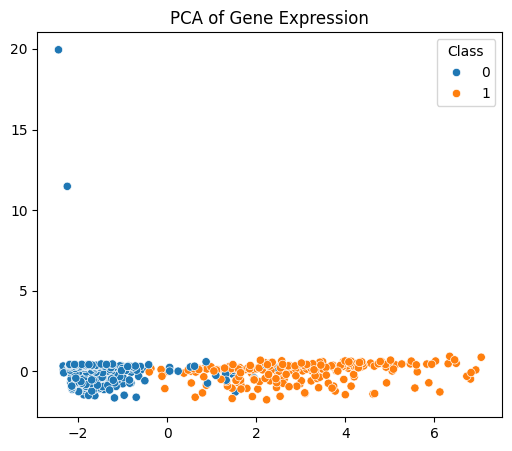

In [14]:
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_reduced)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y)
plt.title("PCA of Gene Expression")
plt.show()


In [15]:
selector = SelectKBest(score_func=f_classif, k=500)
X_selected = selector.fit_transform(X_reduced, y_encoded)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=500 is greater than n_features=10. All the features will be returned.
  warnings.warn(


In [16]:
model = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, stratify=y_encoded, test_size=0.2, random_state=RANDOM_STATE
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [18]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        92
           1       0.92      0.96      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

